***
## Data exploration
***
> **Goals:**
> >  * _types of the columns_
> >  * _the main stats of the columns: mean, std, median, max, min_
> >  * _distribution of input values_
> >  * _binarization of the continuous values and their distributions_
> >  * _bar plot, histograms, violin plot for univariate analysis_
***


In [2]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

***
### *** <font color= "blue"> DATA PREPARATION </fot>  ***
***

In [3]:
titanic = pd.read_csv("train.csv")
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

***
### *** <font color = "blue"> GENERAL OVERVIEW OF DATA </font> *** <br> 
***
> ** tasks: **
> >  * _types of columns_
> >  * _distribution of columns depending on the type of columns_
> >  * _distribution of null values on the data frame_
> >  * _dsitribution of null values by a threshold_
***

In [4]:
shape = titanic.shape

In [5]:
print "columns:  %s  rows: %s" % shape
print "columns to rows ratios is %s" %(shape[1] / shape[0])
print "rows to columns ratio is %s" %(shape[0] / shape[1])
print "rows to columns ratio percentage by total number of rows %s" %((shape[0] * 100 / shape[1]) / shape[0])

columns:  891  rows: 12
columns to rows ratios is 0.013468013468
rows to columns ratio is 74.25
rows to columns ratio percentage by total number of rows 8.33333333333


In [8]:
titanic.dtypes.groupby(titanic.dtypes).groups

{dtype('int64'): ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'],
 dtype('float64'): ['Age', 'Fare'],
 dtype('O'): ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

In [9]:
titanic.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S


In [11]:
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.825,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.550,C22 C26,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.050,NaN,S


In [17]:
titanic.isnull().sum().div(titanic.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [49]:
titanic.select_dtypes(include= [np.object]).apply(lambda l: l.str.isnumeric()).sum()

Name          0.0
Sex           0.0
Ticket      661.0
Cabin         0.0
Embarked      0.0
dtype: float64

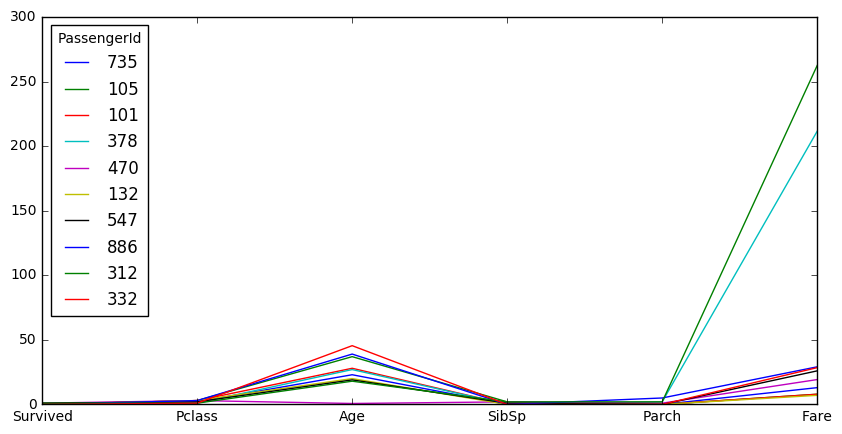

In [68]:
titanic.select_dtypes(include = [np.number]).sample(10).set_index("PassengerId").T.plot(figsize = (10, 5))

In [69]:
titanic.describe()

C:\Users\Lenovo\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
titanic.sample(10).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.00000,10.000000,10.000000,9.000000,10.0,10.0,10.000000
mean,456.10000,0.500000,1.800000,36.222222,0.0,0.0,28.541250
std,309.97292,0.527046,0.918937,13.672763,0.0,0.0,43.023026
min,82.00000,0.000000,1.000000,18.000000,0.0,0.0,0.000000
25%,190.00000,0.000000,1.000000,NaN,0.0,0.0,9.500000
50%,424.50000,0.500000,1.500000,NaN,0.0,0.0,11.420850
75%,719.25000,1.000000,2.750000,NaN,0.0,0.0,29.137500
max,873.00000,1.000000,3.000000,58.000000,0.0,0.0,146.520800


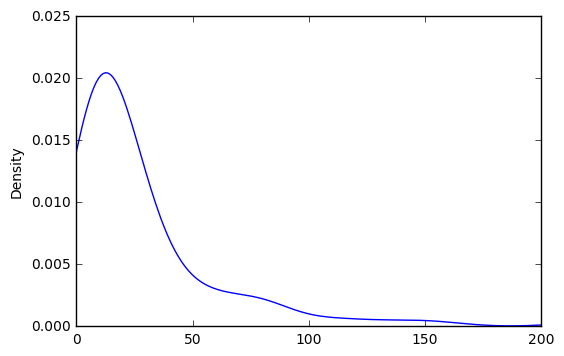

In [76]:
titanic.Fare.plot(kind = "density", xlim = (0, 200))

In [82]:
(titanic.Fare <= 50).value_counts()

True     731
False    160
Name: Fare, dtype: int64

In [86]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
